# Q2.1 PCA of Yale Face Database

## Importing Libraries

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import scipy.io
import copy

plt.rcParams['figure.figsize'] = [8,4]

# Importing Yale Faces Database from .mat file
## scipy.io.loadmat() function imports .mat file as dictonary

In [2]:
data = scipy.io.loadmat('./Yale_64x64.mat')
print(type(data))

<class 'dict'>


## Dictonary to Numpy Array

In [3]:
A = np.array(data['fea']).T

In [4]:
print(A.shape)

(4096, 165)


## Sample Image/Face from database

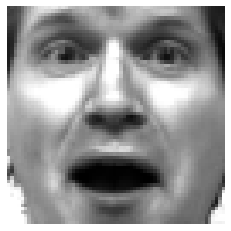

In [5]:
img = plt.imshow(A[:,1].reshape(64,64).transpose())
img.set_cmap('gray')
plt.axis('off')
plt.show()

# Forming Covariance-Matrix

In [6]:
Amean = A.mean(axis=1,keepdims=True)
Am = A - Amean

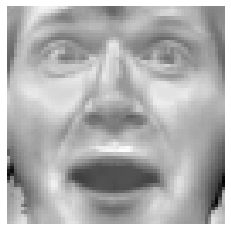

In [7]:
img = plt.imshow(Am[:,1].reshape(64,64).transpose())
img.set_cmap('gray')
plt.axis('off')
plt.show()

# Calculating SVD

In [8]:
U,D,Vt = np.linalg.svd(Am)         # Complete SVD i.e. calculation corresponding to zero singular values also included   --> Slower

# U,D,Vt = np.linalg.svd(Am, full_matrices=False)    # Economy SVD i.e. Calculations corresponding to zero singular values are not done -->Faster

D = np.diag(D)

In [9]:
print(U.shape,D.shape,Vt.shape)

(4096, 4096) (165, 165) (165, 165)


# Finding number of eigen values with least significance

In [10]:
i = 0
n = len(D)
while(i<n):
    if abs(D[i][i]) <10:
        break
    i += 1
eig_vals_with_least_significance = n - i

In [11]:
print(eig_vals_with_least_significance)

3


# Visualizing singular values by plotting graph
## 1. Singular values vs Count
## 2. (Cumulative sum/Total sum) vs Count

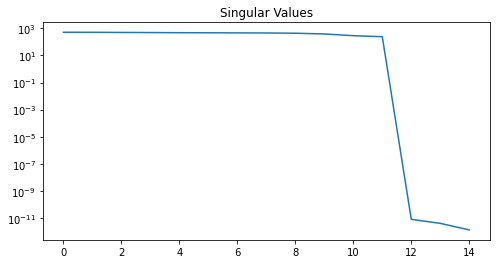

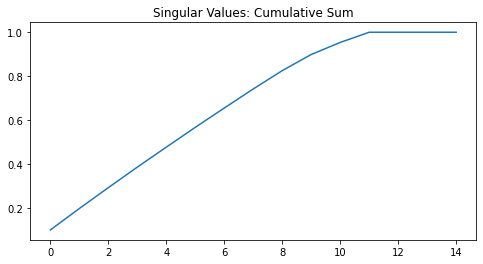

In [12]:
d = D[150:,150:]

plt.figure(1)
plt.semilogy(np.diag(d))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(d))/np.sum(np.diag(d)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

# In Sample Projection and Prediction

In [13]:
sample_size = 150
    
def InSampleProjectionAndReconstruction(image_number):
    
    j = 0

    for r in (50, 100, 200, 500, 800, 2000, 4096, 4096-eig_vals_with_least_significance):
       
        # Construct approximate image
        u = U[:,:r]
        
        # Projection
        A_train_model = np.matmul(u.T,A[:,:sample_size])

        # Reconstruction
        A_train_pred = np.matmul(u,A_train_model)
        Fimg = A_train_pred 

        plt.figure(j+1)
        j += 1
        
        plot1 = plt.subplot(121)
        img =  plt.imshow(A[:,image_number].reshape(64,64).transpose())
        img.set_cmap('gray')
        plt.title(f'Original Image')
        plt.axis('off')
        
        plot2 = plt.subplot(122)
        img2 = plt.imshow(Fimg[:,image_number].reshape(64,64).transpose())
        img2.set_cmap('gray')
        plt.axis('off')
        plt.title(f'Approximate Image (r = {r})')
        plt.show()  

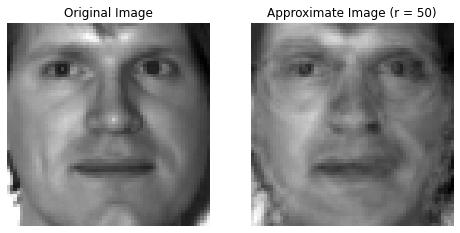

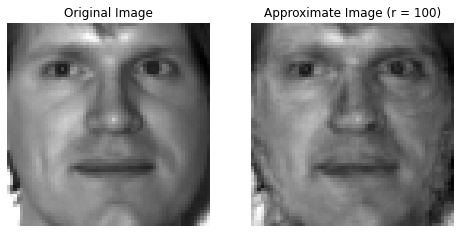

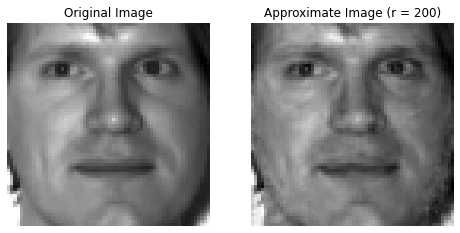

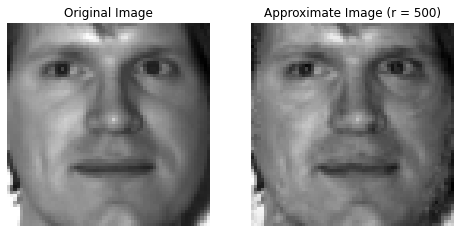

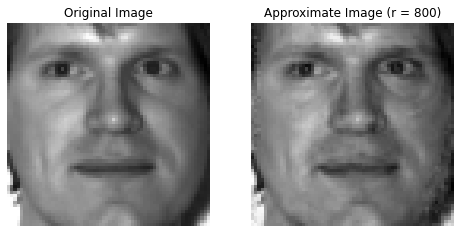

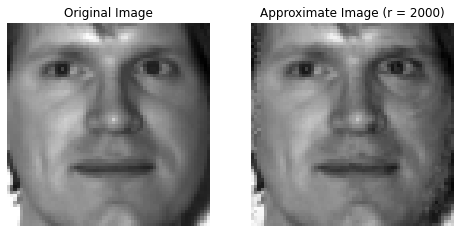

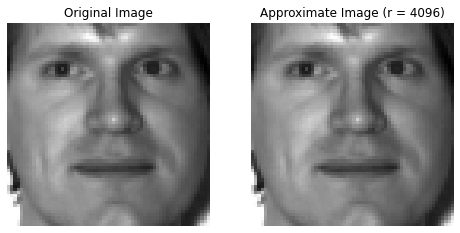

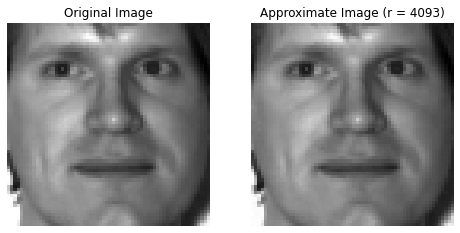

In [14]:
InSampleProjectionAndReconstruction(0)

# Out off Sample Projection and Prediction

In [15]:
def outOffSampleProjectionAndReconstruction(image_number):
    if(image_number>=sample_size):
        j = 0
        for r in (50, 100, 200, 500, 800, 2000,4096, 4096-eig_vals_with_least_significance):
            
            # Construct approximate image
            u = U[:,:r]
            
            # Projection
            A_test_model = np.matmul(u.T,A[:,image_number])

            # Reconstruction
            A_test_pred = np.matmul(u,A_test_model)
            Fimg = A_test_pred 

            plt.figure(j+1)
            j += 1
            
            plt.subplot(121)
            img =  plt.imshow(A[:,image_number].reshape(64,64).transpose() )
        
            img.set_cmap('gray')
            plt.axis('off')
            plt.title(f'Original Image (r = {r})')  
            
            plt.subplot(122)
            img2 = plt.imshow(Fimg.reshape(64,64).transpose())
            img2.set_cmap('gray')
            plt.axis('off')
            plt.title(f'Approximate Image (r = {r})')
            plt.show()
        
    else:
            print("Object Belongs to Sample")

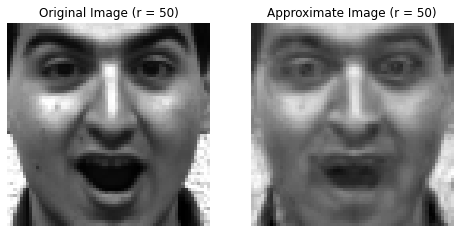

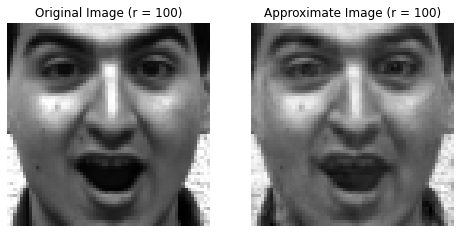

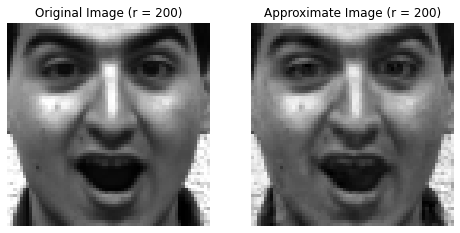

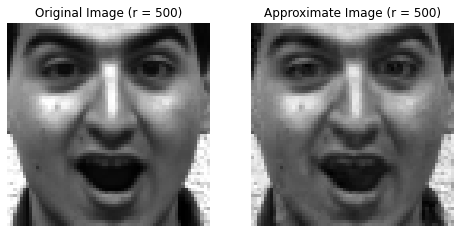

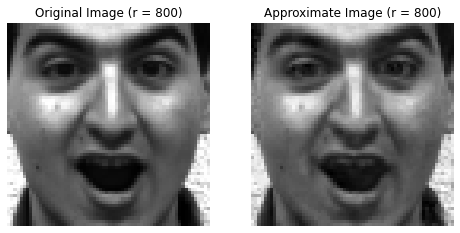

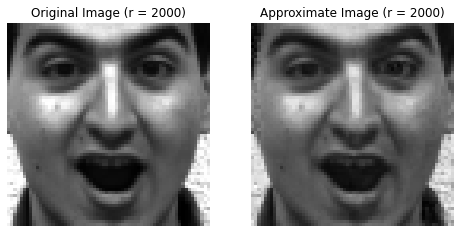

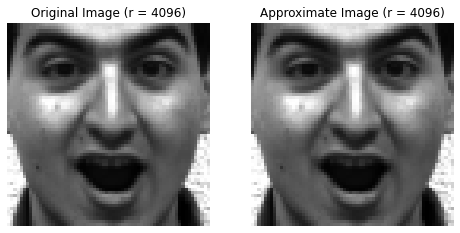

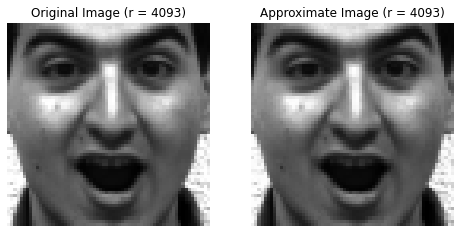

In [16]:
outOffSampleProjectionAndReconstruction(155)